# Domain wall energy class

**Author**: Weiwei Wang

**Date**: Dec 2012

**Purpose**: TODO

As we know, the domain wall will run away if its initial position is not located at the center of the nanowire even without applied field, therefore the domain wall velocity we obtained needs to remove this effect. A straightforward solution is using a longer nanowire, alternatively we provide a energy class -- FixedEnergyDW. First we give a example to reproduce the scene of domain wall running away.

In [1]:
import dolfin as df
import numpy as np
from finmag import Simulation as Sim
from finmag.energies import Exchange
from finmag.energies import Demag
from finmag.energies import FixedEnergyDW
from finmag.util.helpers import set_logging_level
set_logging_level("INFO")

import finmag.util.meshes as ng_mesh

mesh=ng_mesh.box(0, 0, 0, 500, 20, 5, 5)


class init_m(df.Expression):
  
    def eval(self, value, x):
        if x[0] < 100:
            value[0] = 1
            value[1] = 0
        elif x[0] > 120:
            value[0] = -1
            value[1] = 0
        else:
            value[0] = 0
            value[1] = 1
            
    def value_shape(self):
        return (3,)

def relax(max_time=1e-9, num=21, mesh=mesh, init_dw=init_m(), extra_energy=None):
    sim = Sim(mesh, 8.6e5, unit_length=1e-9)
    sim.alpha = 0.5
    sim.set_m(init_dw)

    exchange = Exchange(13.0e-12)
    sim.add(exchange)
    
    demag = Demag(solver='FK')
    demag.parameters['phi_1']['relative_tolerance'] = 1e-8
    demag.parameters['phi_2']['relative_tolerance'] = 1e-8
    sim.add(demag)
    
    if extra_energy:
        sim.add(extra_energy)
    
    ts = np.linspace(0, max_time, num=num)
    
    
    ma=[]
    for t in ts:
        sim.run_until(t)
        #print t
        ma.append(sim.m_average)
    ma=np.array(ma)
    
    return ts, ma

[2014-09-12 15:14:07] INFO: Finmag logging output will be appended to file: '/home/mb4e10/.finmag/global.log'
[2014-09-12 15:14:07] DEBUG: Building modules in 'native'...
[2014-09-12 15:14:09] DEBUG: FinMag          5447:e7409a82df77894c344c17fe5b6b75c49e66ccd6
[2014-09-12 15:14:09] DEBUG: Dolfin          1.4.0                Matplotlib      1.3.1               
[2014-09-12 15:14:09] DEBUG: Numpy           1.8.1                Scipy           0.14.0              
[2014-09-12 15:14:09] DEBUG: IPython         2.1.0                Python          2.7.6               
[2014-09-12 15:14:09] DEBUG: Paraview        4.0.1-1ubuntu1       Sundials        2.5.0               
[2014-09-12 15:14:09] DEBUG: Boost-Python    <unknown>            Linux           Ubuntu 14.04.1 LTS  
[2014-09-12 15:14:09] DEBUG: Registering debug signal handler. Press Ctrl-Z at any time to stop execution and jump into the debugger.
[2014-09-12 15:14:10] WARNING: Warning: Ignoring netgen's output status of 34304.


We relax the system for 8 ns (this will take a few minutes!) and collect the magnetisation data.

In [2]:
ts, ma = relax(max_time=8e-9)

[2014-09-12 15:14:11] INFO: Finmag logging output will be written to file: '/home/mb4e10/finmag/doc/ipython_notebooks_src/unnamed.log' (any old content will be overwritten).
[2014-09-12 15:14:11] INFO: Creating Sim object 'unnamed' (rank=0/1).
[2014-09-12 15:14:11] INFO: <Mesh of topological dimension 3 (tetrahedra) with 1013 vertices and 2413 cells, ordered>
[2014-09-12 15:14:12] INFO: Create integrator sundials with kwargs={}
[2014-09-12 15:14:12] INFO: Simulation will run until t = 0 s.
[2014-09-12 15:14:13] INFO: Simulation has reached time t = 0 s.
[2014-09-12 15:14:13] INFO: Simulation will run until t = 4e-10 s.
[2014-09-12 15:14:21] INFO: Simulation has reached time t = 4e-10 s.
[2014-09-12 15:14:21] INFO: Simulation will run until t = 8e-10 s.
[2014-09-12 15:14:27] INFO: Simulation has reached time t = 8e-10 s.
[2014-09-12 15:14:27] INFO: Simulation will run until t = 1.2e-09 s.
[2014-09-12 15:14:33] INFO: Simulation has reached time t = 1.2e-09 s.
[2014-09-12 15:14:33] INFO: 

/usr/lib/pymodules/python2.7/matplotlib/figure.py:1595: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


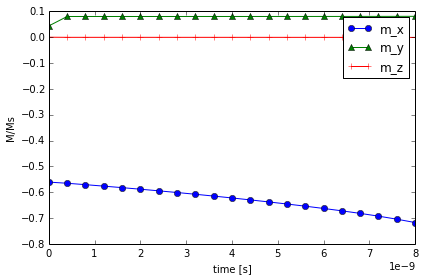

In [4]:
import pylab
%matplotlib inline

def plot_data(ts,ma):
    pylab.plot(ts, ma[:,0], 'o-', label='m_x')
    pylab.plot(ts, ma[:,1], '^-', label='m_y')
    pylab.plot(ts, ma[:,2], '+-', label='m_z')
    pylab.xlabel('time [s]')
    pylab.ylabel('M/Ms') 
    pylab.legend()

plot_data(ts, ma)

And now consider the FixedEnergyDW energy and redo the simulation.

In [5]:
dw = FixedEnergyDW(left=(1, 0, 0), right=(-1, 0, 0), repeat_time=5)
ts, ma = relax(max_time=8e-9, extra_energy=dw)
plot_data(ts, ma)

[2014-09-12 15:17:36] INFO: Finmag logging output will be written to file: '/home/mb4e10/finmag/doc/ipython_notebooks_src/unnamed.log' (any old content will be overwritten).
[2014-09-12 15:17:36] INFO: Creating Sim object 'unnamed' (rank=0/1).
[2014-09-12 15:17:36] INFO: <Mesh of topological dimension 3 (tetrahedra) with 1013 vertices and 2413 cells, ordered>


AttributeError: 'float' object has no attribute 'vector'